In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import wasserstein_distance, norm
from scipy.stats import entropy
from statsmodels.graphics import tsaplots

In [32]:
# First, let's reload the original datasets since the previous dataframes have been altered through oversampling
real_data = pd.read_csv('original_log_br.csv')
#fake_data = pd.read_csv('/content/fake_original(BATCH_50) (2).csv')
#fake_data = pd.read_csv('/content/(forse)fake_original_BATCH_50_LAMBDA_8.csv')
#fake_data = pd.read_csv('/content/fake_original_2000_epochs.csv')
#fake_data = pd.read_csv('/content/fake_original_1701_epochs .csv')
fake_data = pd.read_csv ('fake_original_BRAZIL_1.csv')
#fake_data = pd.read_csv ('/content/fake_original_2000_stride_2_batch_40.csv')
sp500= pd.read_csv('^BVSP.csv')
# Rename the columns for clarity
real_data.rename(columns={'0': 'Log_Return'}, inplace=True)
fake_data.rename(columns={'0': 'Log_Return'}, inplace=True)
#forse_data.rename(columns={'0': 'Log_Return'}, inplace=True)

real_data.drop(real_data.tail(1).index, inplace=True)

In [33]:
date = sp500['Date'][1:-1]
date =date.reset_index(drop=True)
real_data['Date'] = date
#orig_data= orig_data.set_index('Date')
real_data

,Log_Return,Date
0,-0.065855,2000-01-04
1,0.024553,2000-01-05
2,-0.008531,2000-01-06
3,0.012463,2000-01-07
4,0.042790,2000-01-10
...,...,...
2299,-0.010297,2008-12-19
2300,-0.039406,2008-12-22
2301,-0.030992,2008-12-23
2302,0.010718,2008-12-26


In [34]:
fake_data['Date'] = date
#false_data= false_data.set_index('Date')
fake_data

,Log_Return,Date
0,-0.001867,2000-01-04
1,-0.022516,2000-01-05
2,0.001206,2000-01-06
3,0.018825,2000-01-07
4,-0.004802,2000-01-10
...,...,...
2295,-0.013189,2008-12-15
2296,-0.013398,2008-12-16
2297,0.012365,2008-12-17
2298,0.016850,2008-12-18


In [35]:
# Save the DataFrame to a CSV file
csv_filename = 'fake.csv'
fake_data.to_csv(csv_filename, index=False)

In [36]:
# Save the DataFrame to a CSV file
csv_filename = 'real.csv'
real_data.to_csv(csv_filename, index=False)

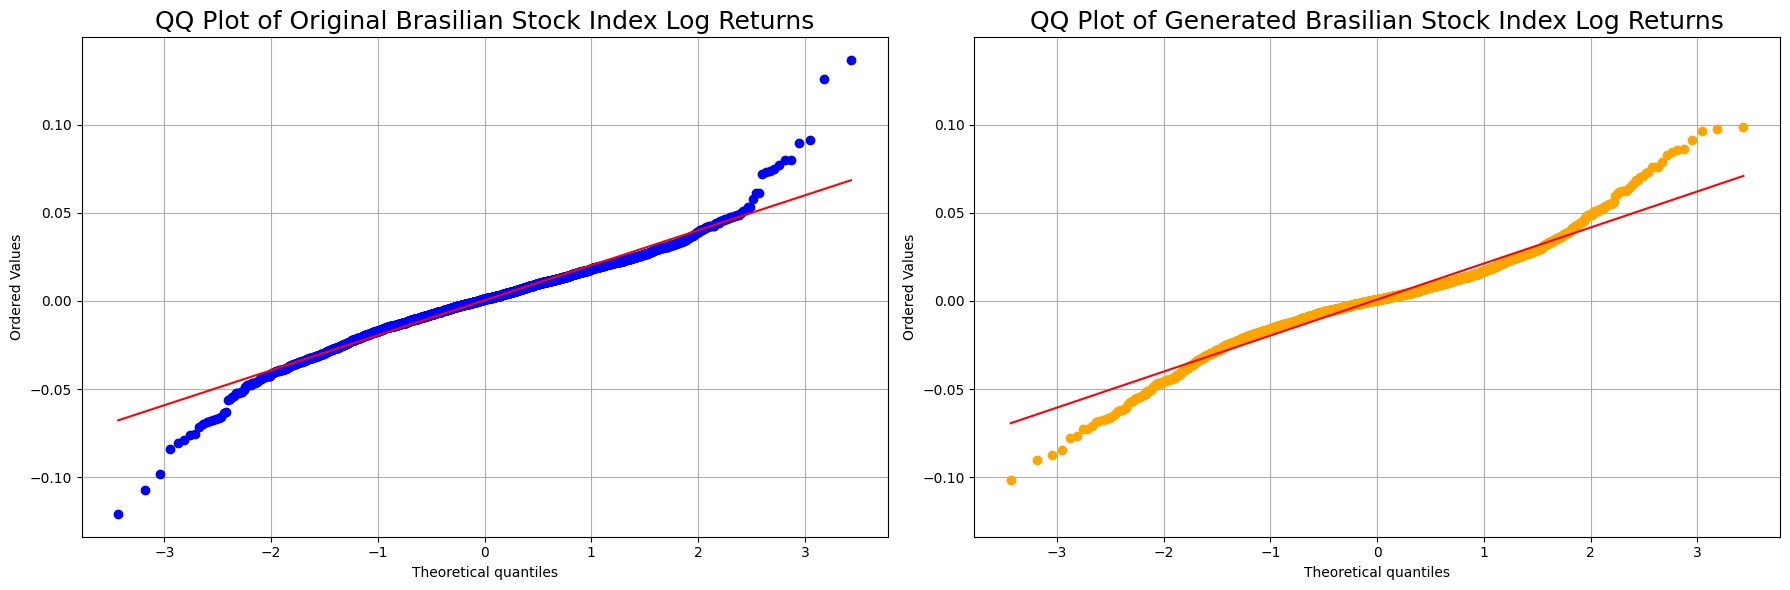

In [37]:
# Ensure both time series are of the same length for comparison
min_length = min(len(real_data), len(fake_data))
real_ts = real_data['Log_Return'][:min_length]
fake_ts = fake_data['Log_Return'][:min_length]

# Generate QQ plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# QQ plot for the original SP500 log returns
stats.probplot(real_ts, dist="norm", plot=ax1)
ax1.set_title('QQ Plot of Original Brasilian Stock Index Log Returns', fontsize= 18)
ax1.grid(True)

# QQ plot for the generated SP500 log returns
stats.probplot(fake_ts, dist="norm", plot=ax2)
ax2.get_lines()[0].set_color('orange')
ax2.set_title('QQ Plot of Generated Brasilian Stock Index Log Returns', fontsize= 18)
ax2.grid(True)

# Set the same scale for y axis
axes = plt.gca()
ylim1 = ax1.get_ylim()
ylim2 = ax2.get_ylim()
global_ylim = (min(ylim1[0], ylim2[0]), max(ylim1[1], ylim2[1]))
ax1.set_ylim(global_ylim)
ax2.set_ylim(global_ylim)

# Show the plots
plt.tight_layout()
plt.show()

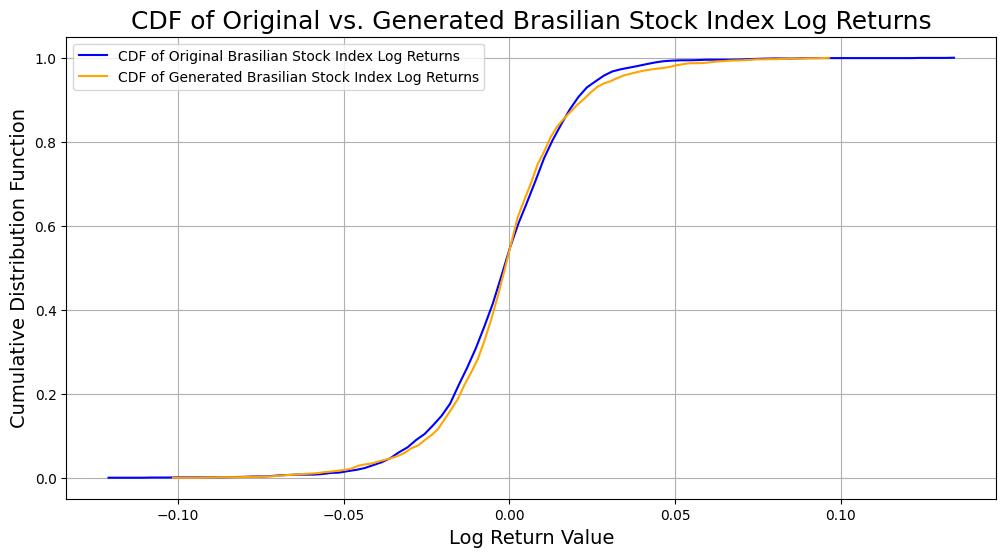

In [38]:
# Calculate the probability distribution of the real and fake time series
real_ts_values, real_ts_base = np.histogram(real_ts, bins=100, density=True)
fake_ts_values, fake_ts_base = np.histogram(fake_ts, bins=100, density=True)

# Compute the cumulative distribution functions for both time series
real_ts_cdf = np.cumsum(real_ts_values * np.diff(real_ts_base))
fake_ts_cdf = np.cumsum(fake_ts_values * np.diff(fake_ts_base))

# Plotting the probability distributions of the real and fake time series
plt.figure(figsize=(12, 6))
plt.plot(real_ts_base[:-1], real_ts_cdf, label='CDF of Original Brasilian Stock Index Log Returns', color='blue')
plt.plot(fake_ts_base[:-1], fake_ts_cdf, label='CDF of Generated Brasilian Stock Index Log Returns', color='orange')
plt.xlabel('Log Return Value',fontsize=14)
plt.ylabel('Cumulative Distribution Function',fontsize=14)
plt.title('CDF of Original vs. Generated Brasilian Stock Index Log Returns',fontsize=18)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

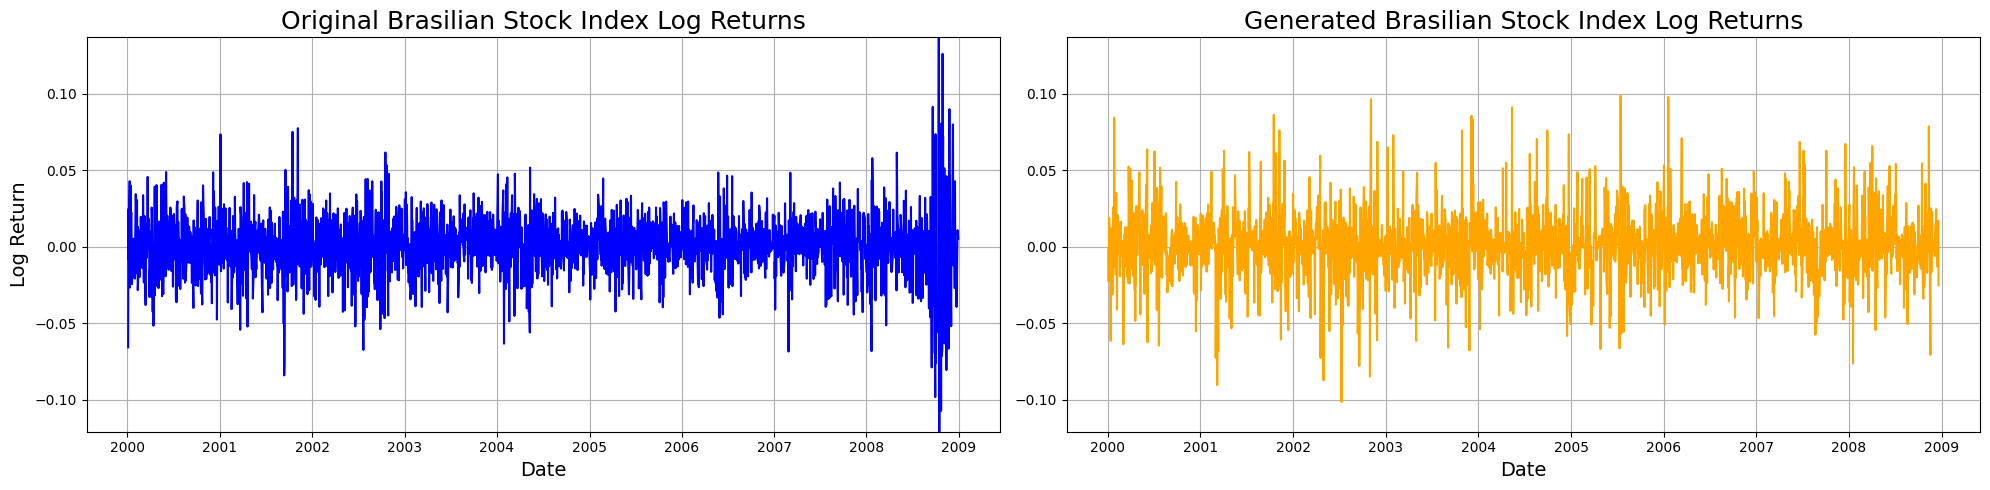

In [39]:
# Plotting the time series with the same y-axis scale

# Convert 'Date' columns to datetime for proper plotting
real_data['Date'] = pd.to_datetime(real_data['Date'])
fake_data['Date'] = pd.to_datetime(fake_data['Date'])

# Determine the global min and max log return values for the y-axis scale
min_log_return = min(real_data['Log_Return'].min(), fake_data['Log_Return'].min())
max_log_return = max(real_data['Log_Return'].max(), fake_data['Log_Return'].max())

# Plot both time series with the same y-axis scale
plt.figure(figsize=(20, 5))

# Plotting the original S&P 500 Log Returns
plt.subplot(1, 2, 1)
plt.plot(real_data['Date'], real_data['Log_Return'], color='blue')
plt.title('Original Brasilian Stock Index Log Returns',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Log Return',fontsize=14)
plt.ylim(min_log_return, max_log_return)
plt.grid(True)

# Plotting the generated S&P 500 Log Returns
plt.subplot(1, 2, 2)
plt.plot(fake_data['Date'], fake_data['Log_Return'], color='orange')
plt.title('Generated Brasilian Stock Index Log Returns',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylim(min_log_return, max_log_return)
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



/var/folders/5f/zmqb9j5n67g0sfyb5dpxvz940000gn/T/ipykernel_24025/3957473258.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(real_ts, hist=False, kde=True,
/var/folders/5f/zmqb9j5n67g0sfyb5dpxvz940000gn/T/ipykernel_24025/3957473258.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

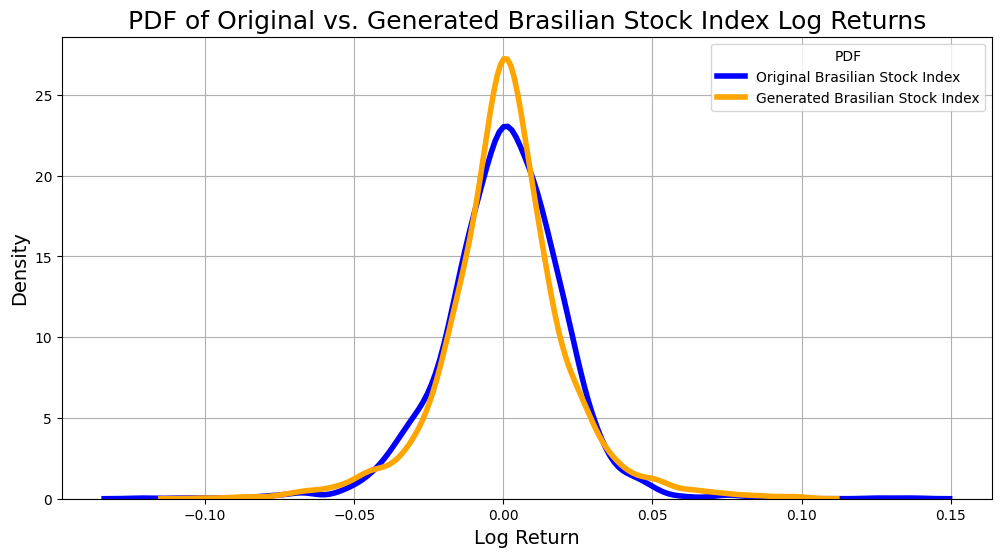

In [40]:
# We will use seaborn's distplot to plot the PDFs of the real and fake data
plt.figure(figsize=(12, 6))

# Plotting the PDF of the original S&P 500 Log Returns
sns.distplot(real_ts, hist=False, kde=True,
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Original Brasilian Stock Index')

# Plotting the PDF of the generated S&P 500 Log Returns
sns.distplot(fake_ts, hist=False, kde=True,
             bins=100, color = 'orange',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Generated Brasilian Stock Index')

# Plot formatting
plt.legend(prop={'size': 10}, title = 'PDF')
plt.title('PDF of Original vs. Generated Brasilian Stock Index Log Returns', fontsize = 18)
plt.xlabel('Log Return', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.grid(True)

# Show the plot
plt.show()


In [41]:
# Calculate the Earth Mover's distance (also known as Wasserstein distance) between the two distributions
emd_value = wasserstein_distance(real_ts, fake_ts)
emd_value


0.0017178486606477445

In [42]:
# Calculate the entropy of the two distributions
# First, we need to calculate the probability distributions (histograms) with the same bins for both time series
real_ts_prob, bins = np.histogram(real_ts, bins=100, density=True)
fake_ts_prob, _ = np.histogram(fake_ts, bins=bins, density=True)

# The histograms are used to approximate the probability distributions, we can now calculate the entropy
# Entropy of the real time series
entropy_real = entropy(real_ts_prob)
# Entropy of the generated time series
entropy_fake = entropy(fake_ts_prob)

entropy_real, entropy_fake

(3.408722962998842, 3.415059530952071)

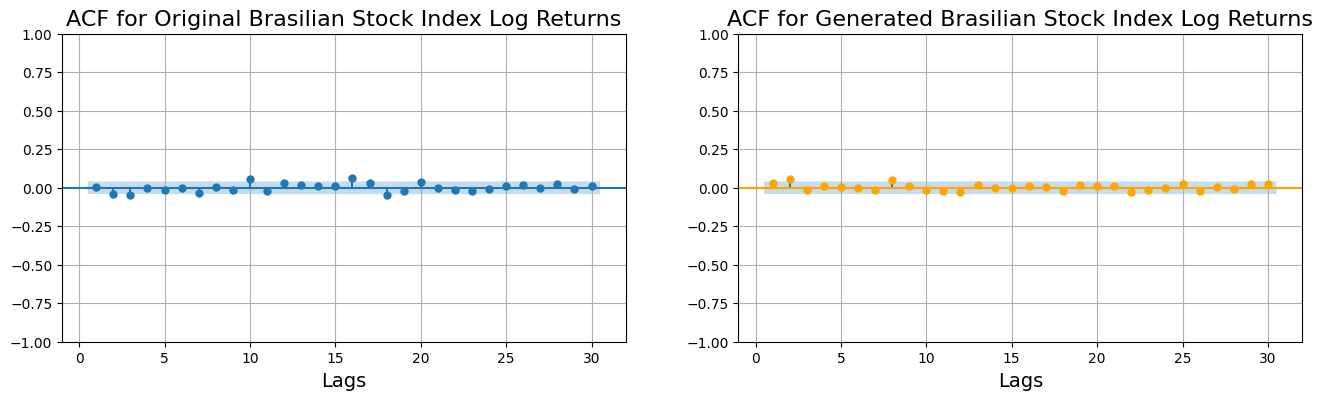

In [43]:
from statsmodels.graphics import tsaplots

# Creating the ACF plots using the provided code structure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Plot autocorrelations of original log-returns on the left
tsaplots.plot_acf(real_ts, ax=axes[0], lags=30, zero=False)
axes[0].set_xlabel('Lags', fontsize = 14)
axes[0].set_title('ACF for Original Brasilian Stock Index Log Returns', fontsize = 16)
axes[0].grid()

# Plot autocorrelations of generated log-returns on the right
tsaplots.plot_acf(fake_ts, ax=axes[1], lags=30, zero=False, color='orange')
axes[1].set_xlabel('Lags', fontsize = 14)
axes[1].set_title('ACF for Generated Brasilian Stock Index Log Returns', fontsize = 16)
axes[1].grid()

plt.show()


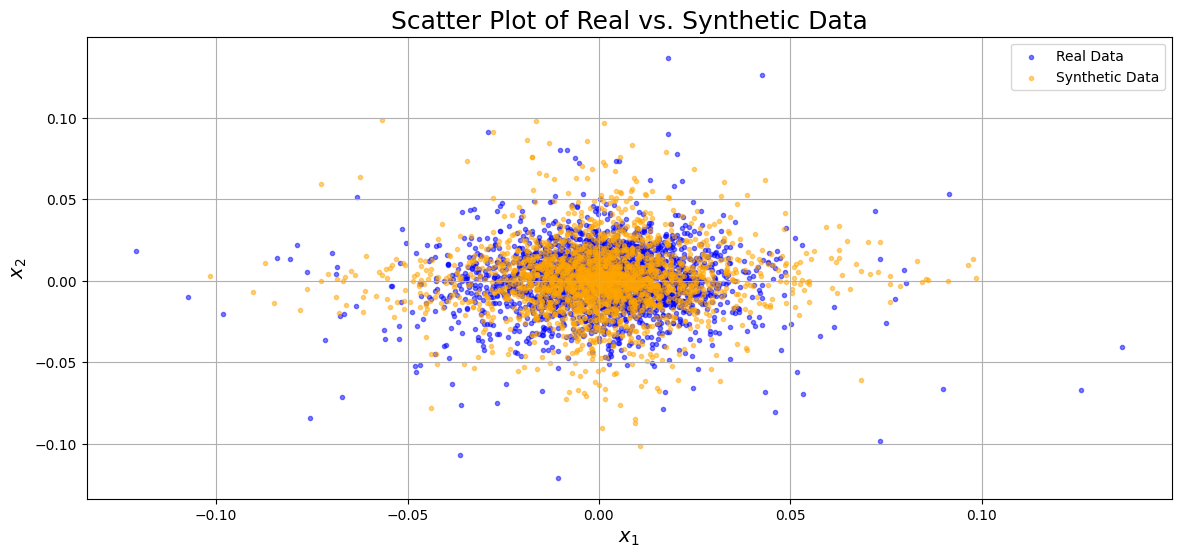

In [44]:
# To reproduce a similar scatter plot for the time series, we will plot the real data against the generated data.
# Since we only have one dimension (the log returns), we'll create a lagged version of the data to allow for a 2D scatter plot.

# Create a lagged version of the time series
real_ts_lagged = real_ts.shift(1).dropna()
fake_ts_lagged = fake_ts.shift(1).dropna()

# Take the same number of points from each to have a fair comparison
min_length = min(len(real_ts_lagged), len(fake_ts_lagged))
real_ts_plot = real_ts_lagged.iloc[:min_length]
fake_ts_plot = fake_ts_lagged.iloc[:min_length]
real_ts_current = real_ts.iloc[1:min_length+1]
fake_ts_current = fake_ts.iloc[1:min_length+1]

# Plot
plt.figure(figsize=(14, 6))
plt.scatter(real_ts_current, real_ts_plot, color='blue', alpha=0.5, label='Real Data', marker='.')
plt.scatter(fake_ts_current, fake_ts_plot, color='orange', alpha=0.5, label='Synthetic Data', marker='.')
plt.xlabel('$x_1$', fontsize = 14)
plt.ylabel('$x_2$', fontsize = 14)
plt.title('Scatter Plot of Real vs. Synthetic Data', fontsize = 18)
plt.legend()
plt.grid()
plt.show()


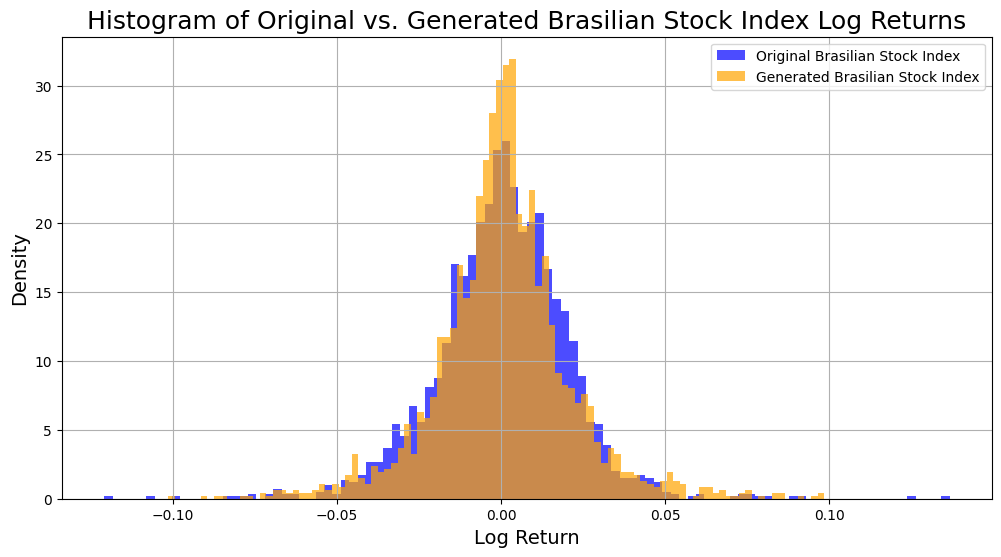

In [45]:
# Plotting the histograms of the two time series one over the other

plt.figure(figsize=(12, 6))

# Plotting the histogram for the original S&P 500 Log Returns
plt.hist(real_ts, bins=100, alpha=0.7, label='Original Brasilian Stock Index', color='blue', density = True)

# Plotting the histogram for the generated S&P 500 Log Returns
plt.hist(fake_ts, bins=100, alpha=0.7, label='Generated Brasilian Stock Index', color='orange', density = True)

plt.xlabel('Log Return', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Histogram of Original vs. Generated Brasilian Stock Index Log Returns', fontsize = 18)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


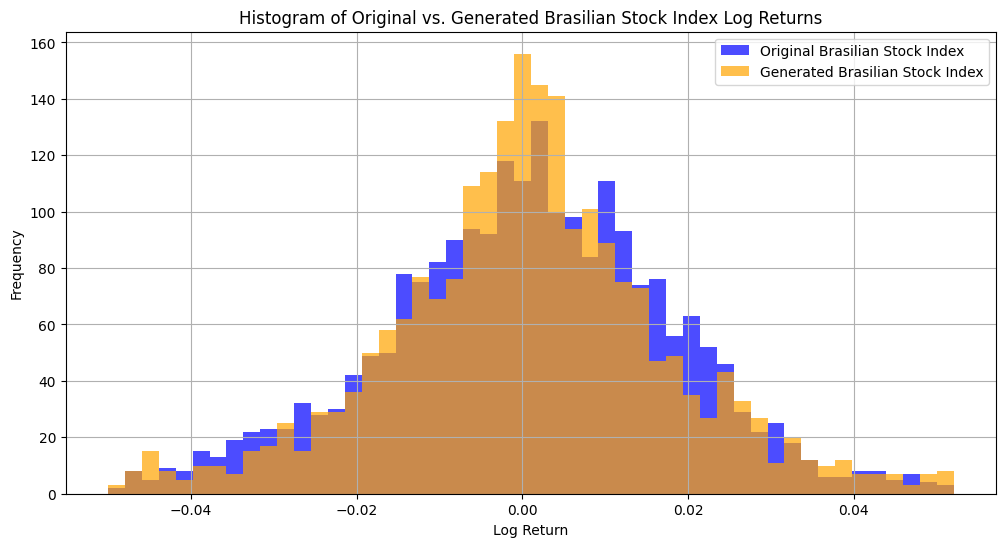

In [46]:
# Plotting the histograms of the two time series one over the other

plt.figure(figsize=(12, 6))
bin_edges = np.linspace(-0.05, 0.05, num=50)  # define the bin edges
bin_width = bin_edges[1] - bin_edges[0]
bin_edges = np.append(bin_edges, bin_edges[-1] + bin_width)
# Plotting the histogram for the original S&P 500 Log Returns
plt.hist(real_ts, bins=bin_edges, alpha=0.7, label='Original Brasilian Stock Index', color='blue')

# Plotting the histogram for the generated S&P 500 Log Returns
plt.hist(fake_ts, bins=bin_edges, alpha=0.7, label='Generated Brasilian Stock Index', color='orange')

plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.title('Histogram of Original vs. Generated Brasilian Stock Index Log Returns')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

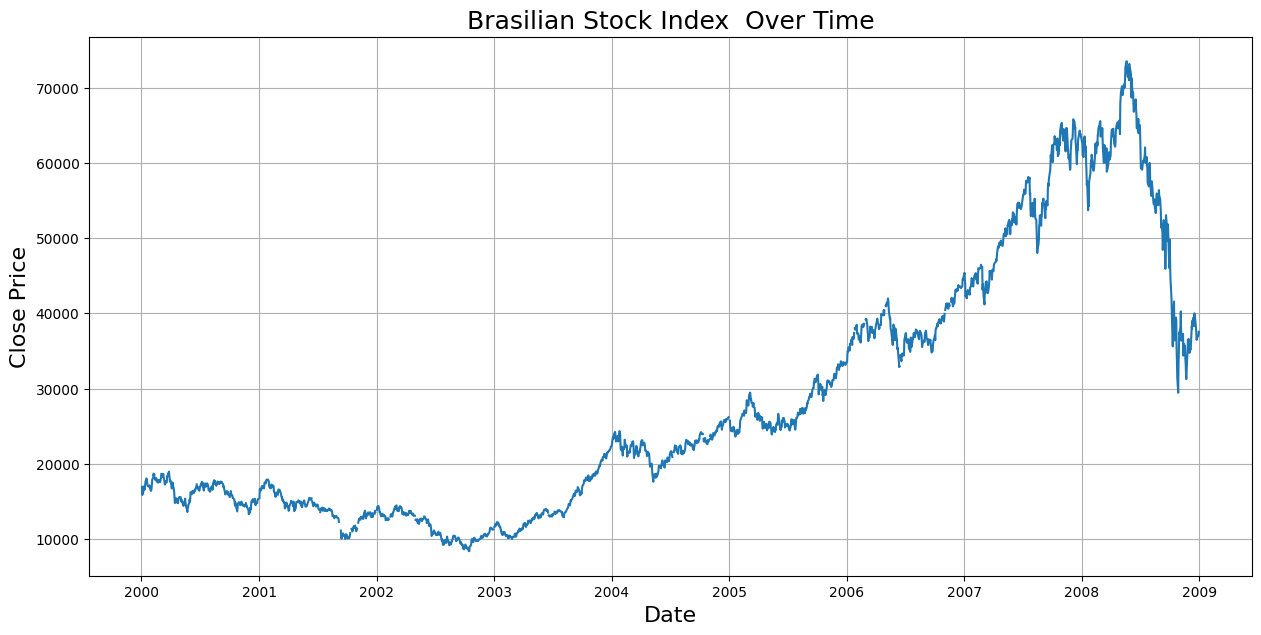

In [47]:
# Converting the 'Date' column to datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

# Plotting the closing price
plt.figure(figsize=(15, 7))
plt.plot(sp500['Date'], sp500['Close'], label='Close Price')
plt.title('Brasilian Stock Index  Over Time', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.grid(True)

plt.show()

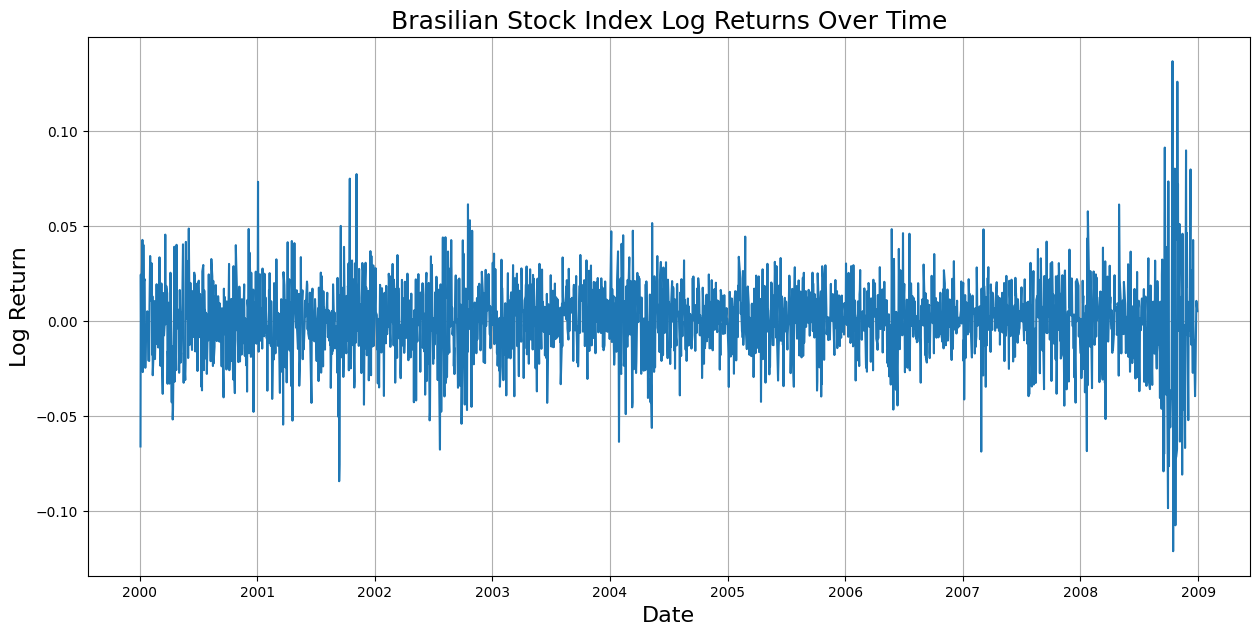

In [48]:
# Converting the 'Date' column to datetime
real_data['Date'] = pd.to_datetime(real_data['Date'])

# Plotting the closing price
plt.figure(figsize=(15, 7))
plt.plot(real_data['Date'], real_data['Log_Return'], label='Close Price')
plt.title('Brasilian Stock Index Log Returns Over Time', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Log Return', fontsize=16)
plt.grid(True)

plt.show()

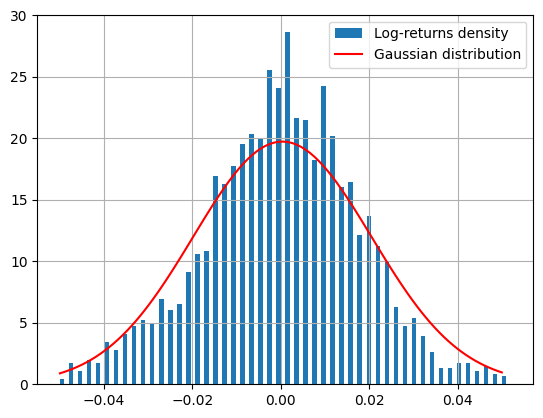

In [49]:


# density of log-returns
bin_edges = np.linspace(-0.05, 0.05, num=50)  # define the bin edges
bin_width = bin_edges[1] - bin_edges[0]
bin_edges = np.append(bin_edges, bin_edges[-1] + bin_width)
plt.hist(real_data['Log_Return'], bins=bin_edges, density=True, width=0.001, label='Log-returns density')
plt.grid()

# normal distribution with same mean and standard deviation as log-returns
mu = np.mean(real_data['Log_Return'])
sigma = np.std(real_data['Log_Return'])

# Generate a set of points x
x = np.linspace(-0.05, 0.05, 100)

# Generate the Gaussian PDF for the points x with same mean and standard deviation as the log-returns
pdf = norm.pdf(x, mu, sigma)

# plot the Gaussian PDF
plt.plot(x, pdf, 'r', label='Gaussian distribution')
plt.legend()

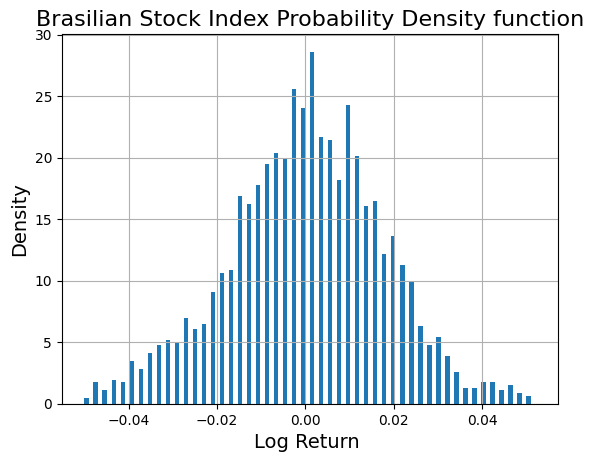

In [50]:
# density of log-returns
bin_edges = np.linspace(-0.05, 0.05, num=50)  # define the bin edges
bin_width = bin_edges[1] - bin_edges[0]
bin_edges = np.append(bin_edges, bin_edges[-1] + bin_width)
plt.hist(real_data['Log_Return'], bins=bin_edges, density=True, width=0.001, label='Log-returns density')
plt.title('Brasilian Stock Index Probability Density function',fontsize=16 )
plt.xlabel('Log Return ',fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid()

In [51]:
min (fake_ts), max(fake_ts)

(-0.1015169393114771, 0.0985032755191329)

In [52]:
min (real_ts), max(real_ts)

(-0.1209605146907293, 0.1367661159466209)

In [53]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [54]:
series1 = real_data['Log_Return'].to_numpy().reshape(-1,1)
series2 = fake_data['Log_Return'].to_numpy().reshape(-1,1)

In [55]:
dtw_distance, warping_path = fastdtw(series1,series2, dist=euclidean)

In [56]:
dtw_distance

34.7972797723727

In [57]:
!pip install dtaidistance

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

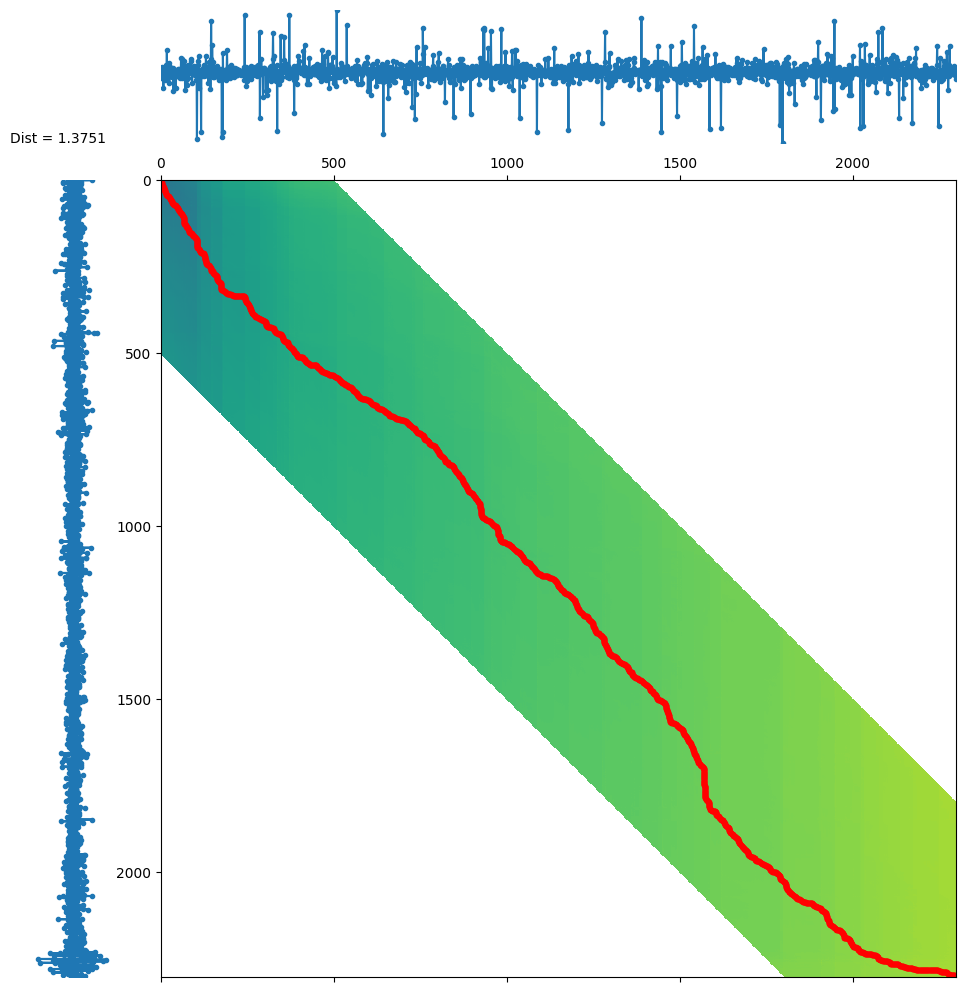

In [58]:
from dtaidistance import dtw_visualisation as dtwvis
import random
from dtaidistance import dtw
import numpy as np

for idx in range(len(series2)):
    if random.random() < 0.05:
        series2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(series1, series2, window=500, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(series1, series2, paths, best_path)

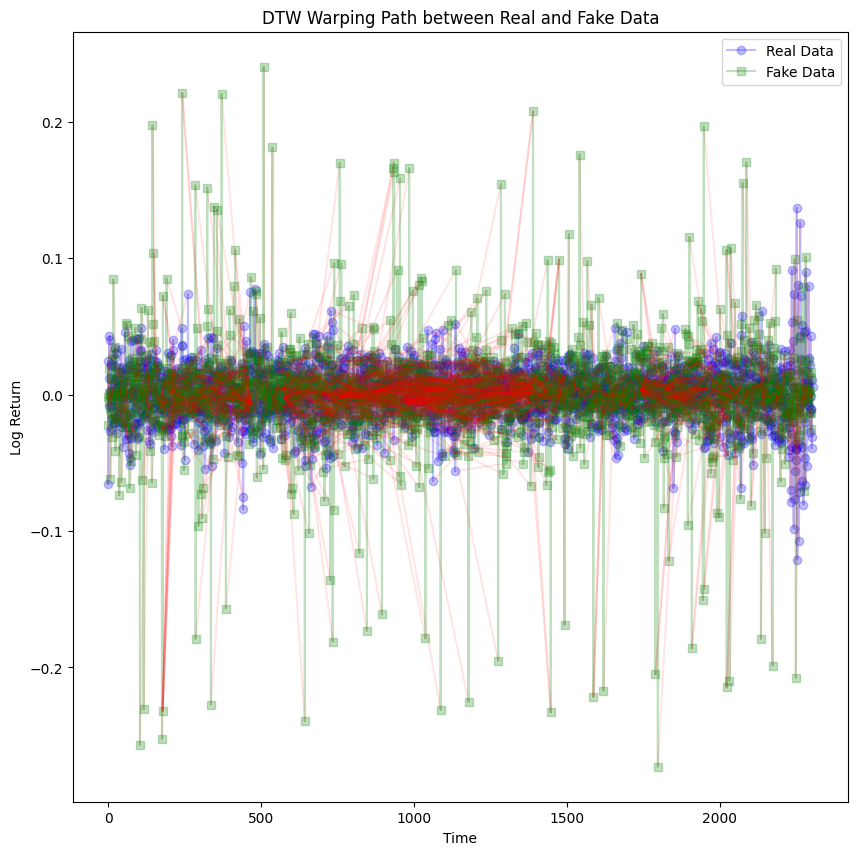

In [59]:
# Re-attempt to plot the warping path correctly

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the first series on the x-axis
ax.plot(series1, 'bo-', label='Real Data', alpha = 0.25)


# Plot the second series on the y-axis
ax.plot(series2, 'gs-', label='Fake Data', alpha = 0.25)

# Draw lines between the matched points in the warping path
for (i, j) in warping_path:
    ax.plot([i, j], [series1[i], series2[j]], 'r-', alpha=0.1)

# Labeling the plot
ax.set_xlabel('Time')
ax.set_ylabel('Log Return')
ax.set_title('DTW Warping Path between Real and Fake Data')
ax.legend()
plt.show()


In [60]:
d

1.3751604219851843